In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/admission_data.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df = df.dropna()
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
# Membuat kolom Outcome berdasarkan Chance of Admit
df['Outcome'] = df['Chance of Admit '].apply(lambda x: 'Diterima' if x >= 0.75 else 'Tidak Diterima')


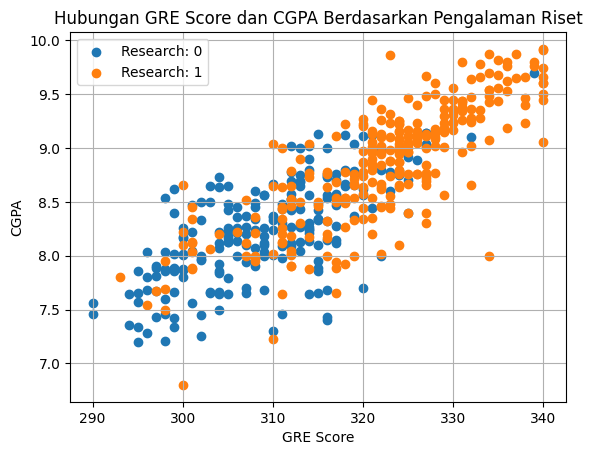

In [7]:
import matplotlib.pyplot as plt

# Membuat plot
fig, ax = plt.subplots()

# Memisahkan data berdasarkan kolom "Research" (0 = Tidak Riset, 1 = Ada Riset)
for research_status, data in df.groupby('Research'):
    ax.scatter(data['GRE Score'], data['CGPA'], label=f"Research: {research_status}")

# Menambahkan detail pada plot
plt.legend(loc='upper left')
plt.title('Hubungan GRE Score dan CGPA Berdasarkan Pengalaman Riset')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()


In [9]:
import numpy as np

# Menggunakan kolom 'GRE Score' dan 'CGPA' sebagai fitur
x_train = np.array(df[['GRE Score', 'CGPA']])

# Menggunakan kolom 'Outcome' sebagai label
y_train = np.array(df['Outcome'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')


x_train:
[[337.     9.65]
 [324.     8.87]
 [316.     8.  ]
 [322.     8.67]
 [314.     8.21]
 [330.     9.34]
 [321.     8.2 ]
 [308.     7.9 ]
 [302.     8.  ]
 [323.     8.6 ]
 [325.     8.4 ]
 [327.     9.  ]
 [328.     9.1 ]
 [307.     8.  ]
 [311.     8.2 ]
 [314.     8.3 ]
 [317.     8.7 ]
 [319.     8.  ]
 [318.     8.8 ]
 [303.     8.5 ]
 [312.     7.9 ]
 [325.     8.4 ]
 [328.     9.5 ]
 [334.     9.7 ]
 [336.     9.8 ]
 [340.     9.6 ]
 [322.     8.8 ]
 [298.     7.5 ]
 [295.     7.2 ]
 [310.     7.3 ]
 [300.     8.1 ]
 [327.     8.3 ]
 [338.     9.4 ]
 [340.     9.6 ]
 [331.     9.8 ]
 [320.     9.2 ]
 [299.     8.4 ]
 [300.     7.8 ]
 [304.     7.5 ]
 [307.     7.7 ]
 [308.     8.  ]
 [316.     8.2 ]
 [313.     8.5 ]
 [332.     9.1 ]
 [326.     9.4 ]
 [322.     9.1 ]
 [329.     9.3 ]
 [339.     9.7 ]
 [321.     8.85]
 [327.     8.4 ]
 [313.     8.3 ]
 [312.     7.9 ]
 [334.     8.  ]
 [324.     8.1 ]
 [322.     8.  ]
 [320.     7.7 ]
 [316.     7.4 ]
 [298.     7.6 ]
 [300

In [10]:
from sklearn.preprocessing import LabelBinarizer

# Inisialisasi LabelBinarizer
lb = LabelBinarizer()

# Transformasi y_train ke dalam bentuk biner
y_train = lb.fit_transform(y_train)

# Menampilkan hasil transformasi
print(f'y_train: {y_train}')


y_train: [[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 

In [11]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 0 0

In [12]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
GRE_Score = 320
CGPA = 9.0
x_new = np.array([GRE_Score, CGPA]).reshape(1, -1)
x_new

array([[320.,   9.]])

In [14]:
y_new = model.predict(x_new)
y_new

array([0])

In [15]:
lb.inverse_transform(y_new)

array(['Diterima'], dtype='<U14')

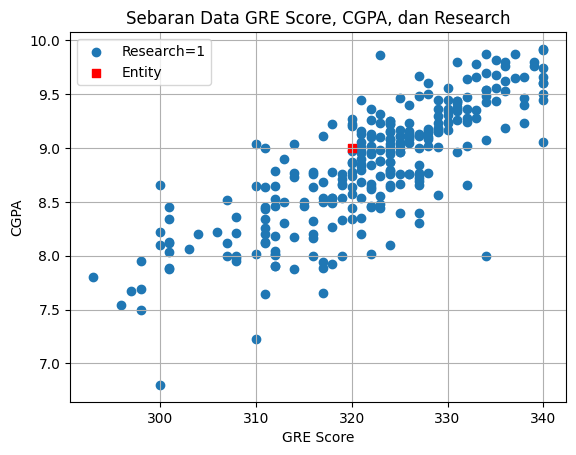

In [18]:
fig, ax = plt.subplots()
for research, d in data.groupby('Research'):
    ax.scatter(d['GRE Score'], d['CGPA'], label=f'Research={research}')

plt.scatter(GRE_Score, CGPA, marker='s', color='red', label='Entity')

plt.legend(loc='upper left')
plt.title('Sebaran Data GRE Score, CGPA, dan Research')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()


In [19]:
Entity = np.array([GRE_Score, CGPA])
Entity

array([320.,   9.])

In [20]:
x_train

array([[337.  ,   9.65],
       [324.  ,   8.87],
       [316.  ,   8.  ],
       [322.  ,   8.67],
       [314.  ,   8.21],
       [330.  ,   9.34],
       [321.  ,   8.2 ],
       [308.  ,   7.9 ],
       [302.  ,   8.  ],
       [323.  ,   8.6 ],
       [325.  ,   8.4 ],
       [327.  ,   9.  ],
       [328.  ,   9.1 ],
       [307.  ,   8.  ],
       [311.  ,   8.2 ],
       [314.  ,   8.3 ],
       [317.  ,   8.7 ],
       [319.  ,   8.  ],
       [318.  ,   8.8 ],
       [303.  ,   8.5 ],
       [312.  ,   7.9 ],
       [325.  ,   8.4 ],
       [328.  ,   9.5 ],
       [334.  ,   9.7 ],
       [336.  ,   9.8 ],
       [340.  ,   9.6 ],
       [322.  ,   8.8 ],
       [298.  ,   7.5 ],
       [295.  ,   7.2 ],
       [310.  ,   7.3 ],
       [300.  ,   8.1 ],
       [327.  ,   8.3 ],
       [338.  ,   9.4 ],
       [340.  ,   9.6 ],
       [331.  ,   9.8 ],
       [320.  ,   9.2 ],
       [299.  ,   8.4 ],
       [300.  ,   7.8 ],
       [304.  ,   7.5 ],
       [307.  ,   7.7 ],


In [21]:
from scipy.spatial.distance import euclidean

data_JarakRumah = [euclidean(Entity, d) for d in x_train]
data_JarakRumah

[17.012421932223525,
 4.0021119424623794,
 4.123105625617661,
 2.0270421801235416,
 6.051784860683664,
 10.005778330544805,
 1.2806248474865702,
 12.050311199301037,
 18.027756377319946,
 3.026549190084311,
 5.035871324805669,
 7.0,
 8.000624975587845,
 13.038404810405298,
 9.035485598461214,
 6.040695324215582,
 3.014962686336267,
 1.4142135623730951,
 2.009975124224178,
 17.00735135169495,
 8.075270893288968,
 5.035871324805669,
 8.0156097709407,
 14.01748907615055,
 16.01998751560063,
 20.008997975910738,
 2.009975124224178,
 22.051077071199945,
 25.064716236175506,
 10.143470806385752,
 20.020239758804088,
 7.034912934784623,
 18.00444389588304,
 20.008997975910738,
 11.02905254316979,
 0.1999999999999993,
 21.008569680013917,
 20.03596765818911,
 16.070158679988197,
 13.064838307457157,
 12.041594578792296,
 4.079215610874228,
 7.0178344238090995,
 12.000416659433121,
 6.013318551349164,
 2.0024984394500787,
 9.004998611882181,
 19.012890364171355,
 1.0111874208078342,
 7.02566722

In [22]:
df['jarak Rumah'] = data_JarakRumah
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Outcome,jarak Rumah
0,337,118,4,4.5,4.5,9.65,1,0.92,Diterima,17.012422
1,324,107,4,4.0,4.5,8.87,1,0.76,Diterima,4.002112
2,316,104,3,3.0,3.5,8.00,1,0.72,Tidak Diterima,4.123106
3,322,110,3,3.5,2.5,8.67,1,0.80,Diterima,2.027042
4,314,103,2,2.0,3.0,8.21,0,0.65,Tidak Diterima,6.051785
...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,Diterima,12.000017
496,337,117,5,5.0,5.0,9.87,1,0.96,Diterima,17.022247
497,330,120,5,4.5,5.0,9.56,1,0.93,Diterima,10.015668
498,312,103,4,4.0,5.0,8.43,0,0.73,Tidak Diterima,8.020281


In [23]:
x_test = np.array([[168, 65], [180, 86], [160, 67], [143, 63]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita']))

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[168  65]
 [180  86]
 [160  67]
 [143  63]]

y_test:
[[0]
 [0]
 [0]
 [0]]


In [24]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)


print(f'Accuracy: {acc}')

Accuracy: 0.0


In [26]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precision: {prec}')

Precision: 0.0


In [27]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.0


In [29]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [30]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
